In [1]:
suppressWarnings(suppressMessages(source("../config/config_sing.R")))

In [2]:
fdiry = file.path(FD_RES, "A001_K562_WSTARRseq", "coverage")
fglob = file.path(fdiry, "*Input*GATA1*unstranded*")
Sys.glob(fglob) %>% basename

[1] "A001_K562_WSTARRseq_Input_rep1.GATA1.unstranded.perbase.tsv.gz" 
[2] "A001_K562_WSTARRseq_Input_rep1.GATA1.unstranded.total_count.tsv"
[3] "A001_K562_WSTARRseq_Input_rep2.GATA1.unstranded.perbase.tsv.gz" 
[4] "A001_K562_WSTARRseq_Input_rep2.GATA1.unstranded.total_count.tsv"
[5] "A001_K562_WSTARRseq_Input_rep3.GATA1.unstranded.perbase.tsv.gz" 
[6] "A001_K562_WSTARRseq_Input_rep3.GATA1.unstranded.total_count.tsv"
[7] "A001_K562_WSTARRseq_Input_rep4.GATA1.unstranded.perbase.tsv.gz" 
[8] "A001_K562_WSTARRseq_Input_rep4.GATA1.unstranded.total_count.tsv"

In [3]:
fdiry = file.path(FD_RES, "A001_K562_WSTARRseq", "coverage")
fglob = file.path(fdiry, "*Output*GATA1*unstranded*")
Sys.glob(fglob) %>% basename

[1] "A001_K562_WSTARRseq_Output_rep1.GATA1.unstranded.perbase.tsv.gz" 
[2] "A001_K562_WSTARRseq_Output_rep1.GATA1.unstranded.total_count.tsv"
[3] "A001_K562_WSTARRseq_Output_rep2.GATA1.unstranded.perbase.tsv.gz" 
[4] "A001_K562_WSTARRseq_Output_rep2.GATA1.unstranded.total_count.tsv"
[5] "A001_K562_WSTARRseq_Output_rep3.GATA1.unstranded.perbase.tsv.gz" 
[6] "A001_K562_WSTARRseq_Output_rep3.GATA1.unstranded.total_count.tsv"

In [4]:
fdiry = file.path(FD_RES, "A001_K562_WSTARRseq", "coverage")
fname = "A001_K562_WSTARRseq_Output_rep1.GATA1.unstranded.perbase.tsv.gz"
fpath = file.path(fdiry, fname)

txt = paste("zcat", fpath, "|", "wc -l")
system(txt, intern=TRUE)

[1] "1999651"

## Import data

In [5]:
### set file path
fdiry = file.path(FD_RES, "A001_K562_WSTARRseq", "coverage")
fname = "A001_K562_WSTARRseq_Input_rep1.GATA1.unstranded.perbase.tsv.gz"
fpath = file.path(fdiry, fname)

### set colnumn
#ctypes = c(col_character(), col_integer(), col_integer(), col_integer())
cnames = c("Chrom", "Start", "End", "Count")

### import data
dat = read_tsv(
    fpath,
    col_names = cnames,
    show_col_types = FALSE)

dat = dat %>% dplyr::mutate(Sample = "Input_rep1")

### assign
dat_wstarr_gata1_inp = dat
print(dim(dat))
head(dat)

[1] 1999651       5


Chrom,Start,End,Count,Sample
<chr>,<dbl>,<dbl>,<chr>,<chr>
chrX,47786880,47786881,.,Input_rep1
chrX,47786881,47786882,.,Input_rep1
chrX,47786882,47786883,.,Input_rep1
chrX,47786883,47786884,.,Input_rep1
chrX,47786884,47786885,.,Input_rep1
chrX,47786885,47786886,.,Input_rep1


In [6]:
### set file path
fdiry = file.path(FD_RES, "A001_K562_WSTARRseq", "coverage")
fname = "A001_K562_WSTARRseq_Output_rep1.GATA1.unstranded.perbase.tsv.gz"
fpath = file.path(fdiry, fname)

### set colnumn
#ctypes = c(col_character(), col_integer(), col_integer(), col_integer())
cnames = c("Chrom", "Start", "End", "Count")

### import data
dat = read_tsv(
    fpath,
    col_names = cnames,
    show_col_types = FALSE)
dat = dat %>% dplyr::mutate(Sample = "Output_rep1")

### assign
dat_wstarr_gata1_out = dat
print(dim(dat))
head(dat)

[1] 1999651       5


Chrom,Start,End,Count,Sample
<chr>,<dbl>,<dbl>,<chr>,<chr>
chrX,47786880,47786881,.,Output_rep1
chrX,47786881,47786882,.,Output_rep1
chrX,47786882,47786883,.,Output_rep1
chrX,47786883,47786884,.,Output_rep1
chrX,47786884,47786885,.,Output_rep1
chrX,47786885,47786886,.,Output_rep1


In [7]:
### where to visualize
LOC_START  = 48780000
LOC_END    = 48826000

dat = bind_rows(dat_wstarr_gata1_inp, dat_wstarr_gata1_out)
dat = dat %>% 
    dplyr::filter(Count != ".") %>%
    dplyr::filter(Start >= LOC_START, End <= LOC_END) %>%
    dplyr::mutate(across(c(Start, End, Count), as.integer)) %>%
    dplyr::mutate(Loc = End)
    
head(dat)

Chrom,Start,End,Count,Sample,Loc
<chr>,<int>,<int>,<int>,<chr>,<int>
chrX,48780000,48780001,5,Input_rep1,48780001
chrX,48780001,48780002,5,Input_rep1,48780002
chrX,48780002,48780003,5,Input_rep1,48780003
chrX,48780003,48780004,5,Input_rep1,48780004
chrX,48780004,48780005,5,Input_rep1,48780005
chrX,48780005,48780006,5,Input_rep1,48780006


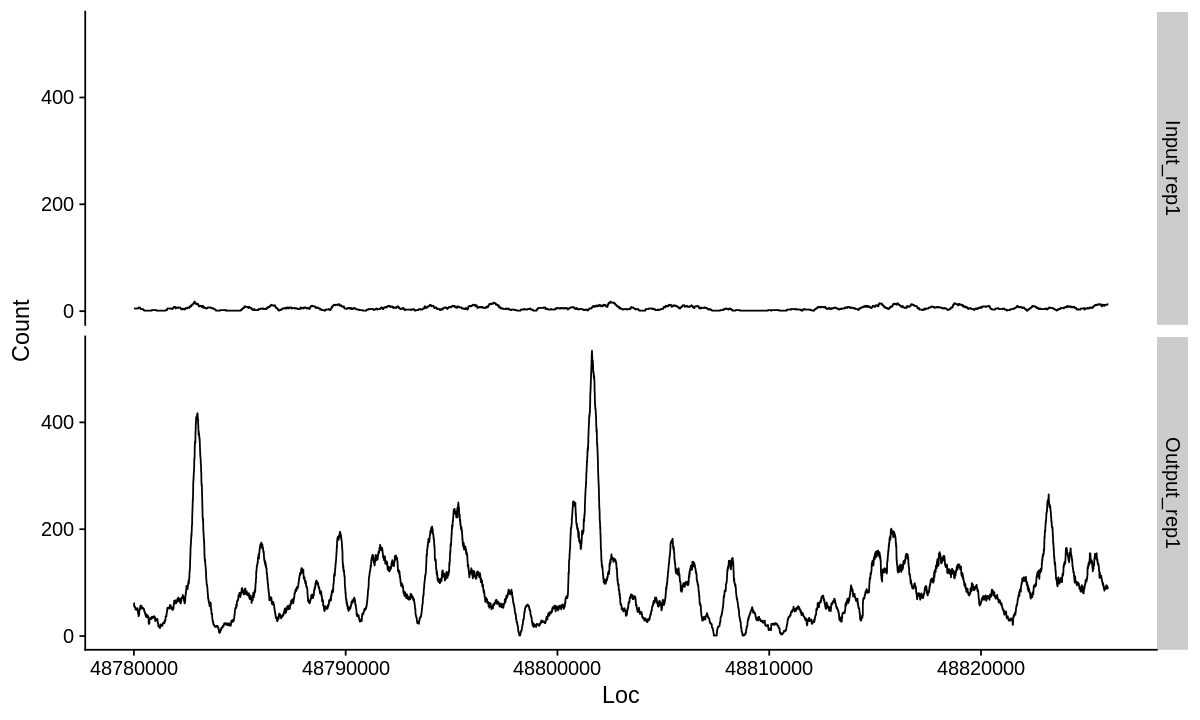

In [9]:
gpt = ggplot(dat, aes(x=Loc, Count)) + geom_line() + theme_cowplot() + facet_grid(Sample~.)
options(repr.plot.height=6, repr.plot.width=10)
print(gpt)